In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from jupyterthemes import jtplot
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Analaysing the Imported Data

In [ ]:
twitter_df = pd.read_csv("twitter.csv")
twitter_df.drop(['id'],axis=1,inplace=True)   # removing id column since id,index gives the same data
print(twitter_df.head())

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation


In [ ]:
twitter_df['length'] = twitter_df['tweet'].apply(len)
twitter_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


2242
29720


<AxesSubplot: xlabel='label', ylabel='count'>

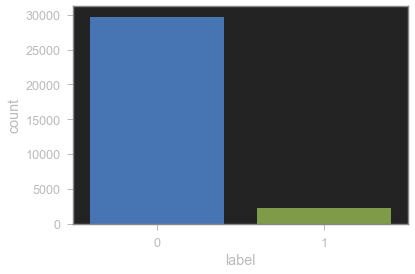

In [ ]:
negative_df = twitter_df.loc[twitter_df['label'] == 1]
print(negative_df['tweet'].count())

positive_df = twitter_df.loc[twitter_df['label'] == 0]
print(positive_df['tweet'].count())

sns.countplot(x=twitter_df['label'] ,data=twitter_df)

<AxesSubplot: ylabel='Frequency'>

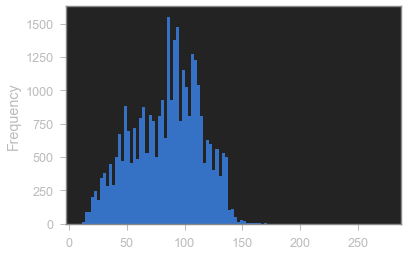

In [ ]:
twitter_df['length'].plot.hist(bins=100)

In [ ]:
twitter_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [ ]:
# Lets see the msgs with average length
print(twitter_df[twitter_df["length"] == 85])

       label                                              tweet  length
115        0   â #under the spell of brexit referendum - c...      85
242        0  make today count! #mondaymotivation #livelifet...      85
384        0  dream palace, can we move in already? #stellar...      85
573        0  @user monkeys are also declared as vermin. no ...      85
634        0  save thousands $$ free search x logins x broke...      85
...      ...                                                ...     ...
31393      0  #flagday2016   #flag #day #2016 #(30 #photos) ...      85
31468      0  jts88troxy theater   jts88@user ð #love #si...      85
31542      0  stretched to the limit and still #waiting pati...      85
31773      0  this reminds me of this. i am   love these two...      85
31799      0  can #lighttherapy help with   or #depression? ...      85

[387 rows x 3 columns]


## ANALAYSING THE WORD TWEETS

In [ ]:
tweets = twitter_df['tweet'].to_list()
positive_tweets = positive_df['tweet'].to_list()
negative_tweets = negative_df['tweet'].to_list()
print("Total Tweets = ",len(tweets))
print("Positive Tweets = ",len(positive_tweets))
print("Negative Tweets = ",len(negative_tweets))

Total Tweets =  31962
Positive Tweets =  29720
Negative Tweets =  2242


In [ ]:
one_string_tweets = " ".join(tweets)
one_string_positive_tweets = " ".join(positive_tweets)
one_string_negative_tweets = " ".join(negative_tweets)

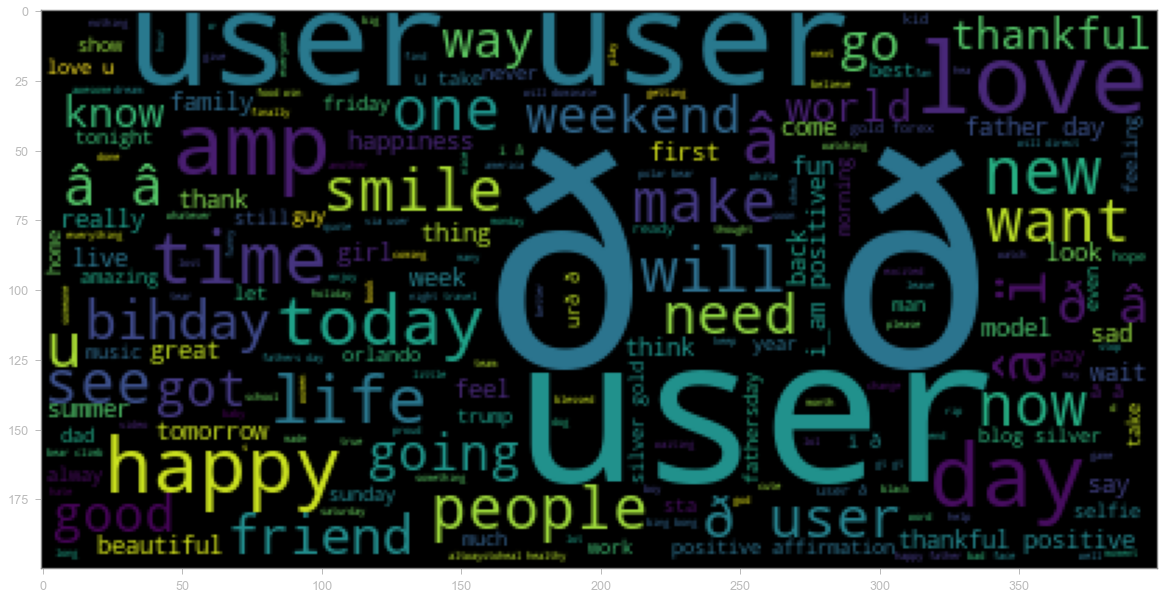

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(one_string_tweets))

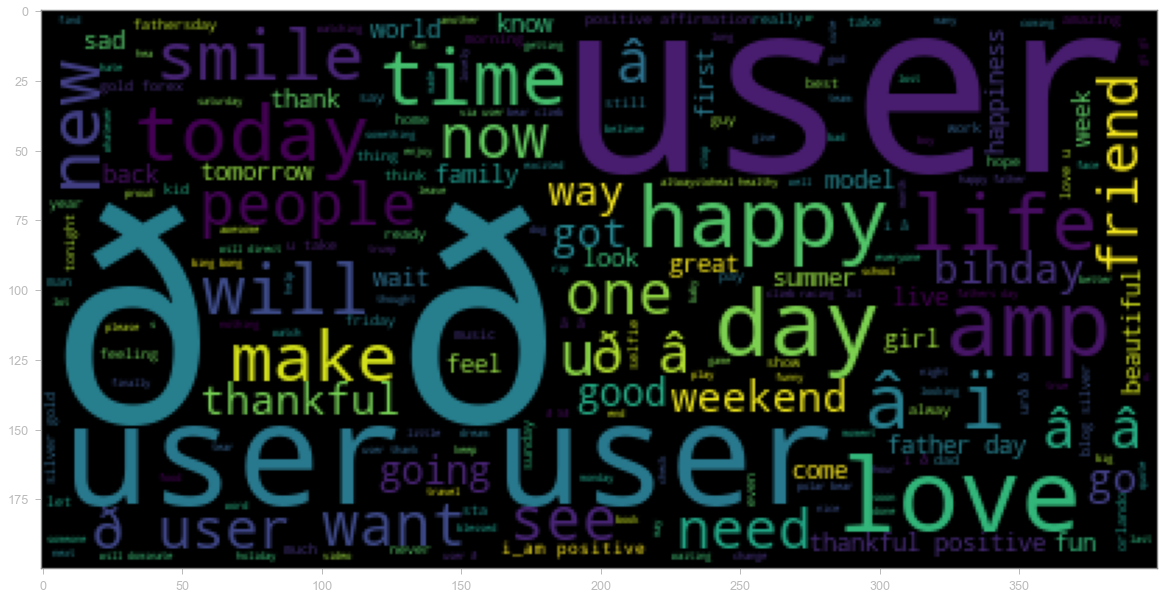

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(one_string_positive_tweets))

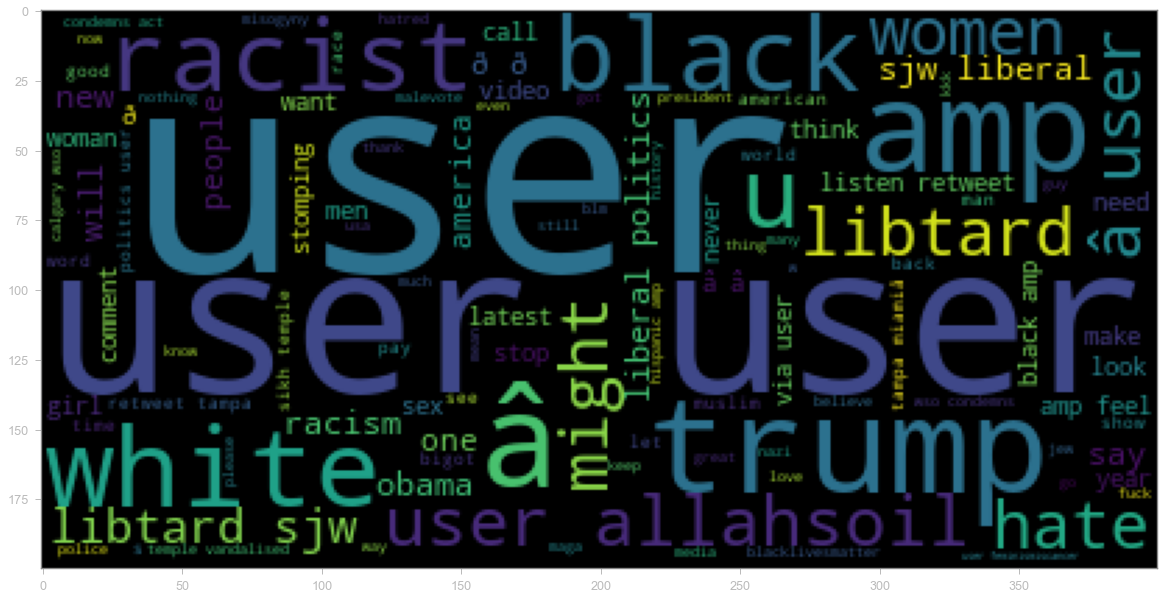

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(one_string_negative_tweets))

### Data Cleaning by removing the punctuation from tweets

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'
test_without_punctuation = [char for char in Test if char not in string.punctuation]
test_without_punctuation = ''.join(test_without_punctuation)
test_without_punctuation

'Good morning beautiful people  I am having fun learning Machine learning and AI'

### Data Cleaning by removing the stopwords from tweets

In [ ]:
test_removed_stopwords = [word for word in test_without_punctuation.split() if word.lower() not in stopwords.words('english')]
test_removed_stopwords = " ".join(test_removed_stopwords)
test_removed_stopwords

'Good morning beautiful people fun learning Machine learning AI'

### Count Vectorizer

In [ ]:
sample_new = ['This is first method.', 'This method is the second method.', 'This new one is the third one.' ]

In [ ]:
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(sample_new)
# Converting to Dataframe
count_matrix_df = pd.DataFrame(count_matrix.toarray() , columns=vectorizer.get_feature_names_out())
count_matrix_df

,first,is,method,new,one,second,the,third,this
0,1,1,1,0,0,0,0,0,1
1,0,1,2,0,0,1,1,0,1
2,0,1,0,1,2,0,1,1,1


# Cleaning the Original Data of tweets by removing punctuations and stopwords

In [91]:
def cleanMessage(message):
    message_without_punctuation = [char for char in message.lower() if char not in string.punctuation]
    message_without_punctuation_join = ''.join(message_without_punctuation)
    test_removed_stopwords = [word for word in message_without_punctuation_join.split() if word.lower() not in stopwords.words('english')]
    return test_removed_stopwords

In [92]:
# This Segment takes around 3 minutes to complete
cleaned_tweets = twitter_df['tweet'].apply(cleanMessage)


In [93]:
print("Cleaned Data  =  ",cleaned_tweets[5])
print("original Data =  ", twitter_df['tweet'][5])

Cleaned Data  =   ['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']
original Data =   [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


# Applying Count Vectorizer for cleaned Tweets

In [94]:
# This code Segment takes around 4 minutes to run due to huge data
vectorizer_analyzer = CountVectorizer(analyzer = cleanMessage)
countvectorizer_tweets = CountVectorizer(analyzer= cleanMessage, dtype= 'uint8').fit_transform(twitter_df['tweet']).toarray()

In [95]:
countvectorizer_tweets.shape

(31962, 47385)

## Splitting the Data into train and test

In [101]:
x_train , x_test , y_train , y_test = train_test_split(countvectorizer_tweets,twitter_df['label'],test_size = 0.3, random_state =9)